In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

In [2]:
path = '/home/PedroSci/Documents/RegistroClima/PortfolioSelection/dataAdjClose.csv'
stocks = ['KO',	'NFLX',	'TSLA']
num_portfolios = 500
risk_free_rate = 0.0178

In [3]:
def load_DB(path:str):
    'load a csv database'
    data = pd.read_csv(filepath_or_buffer=path)
    return data

In [4]:
def createDataset(path:str, stocks:list):
    df_complete = load_DB(path=path)  
    df_complete['Date'] = pd.to_datetime(df_complete['Date']) #change str to datetime Date column
    df_complete= df_complete.set_index('Date') # return the date column as index
    filter_df   = df_complete[stocks] # filter about assets list 
    table =  filter_df.dropna() #drop NA records
    return table

In [5]:
# df_complete = load_DB(path=path)  
# df_complete['Date'] = pd.to_datetime(df_complete['Date']) #change str to datetime Date column
# df_complete= df_complete.set_index('Date') # return the date column as index
# filter_df   = df_complete[stocks] # filter about assets list 
# table =  filter_df.dropna() #drop NA records
table = createDataset(path=path, stocks=stocks)
table

,KO,NFLX,TSLA
Date,,,
2010-06-29,16.594770,16.082857,1.592667
2010-06-30,16.525530,15.521429,1.588667
2010-07-01,16.495853,15.665714,1.464000
2010-07-02,16.502451,15.297143,1.280000
2010-07-06,16.627743,15.324286,1.074000
...,...,...,...
2024-02-22,61.150002,588.469971,197.410004
2024-02-23,61.200001,583.559998,191.970001
2024-02-26,60.709999,587.650024,199.399994


In [6]:
def table_retusns_cov(table):
    returns = table.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return returns, mean_returns, cov_matrix

Text(0, 0.5, 'price in $')

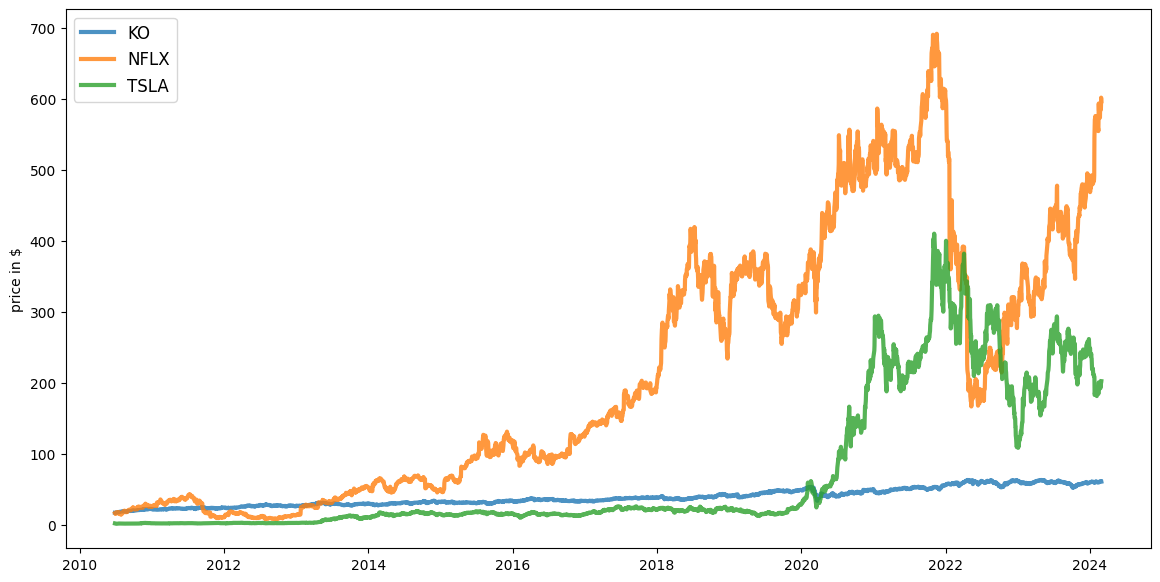

In [7]:
plt.figure(figsize=(14,7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3,alpha=0.8, label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

calcularemos la tabla con las diferencias log

Text(0, 0.5, 'price in $')

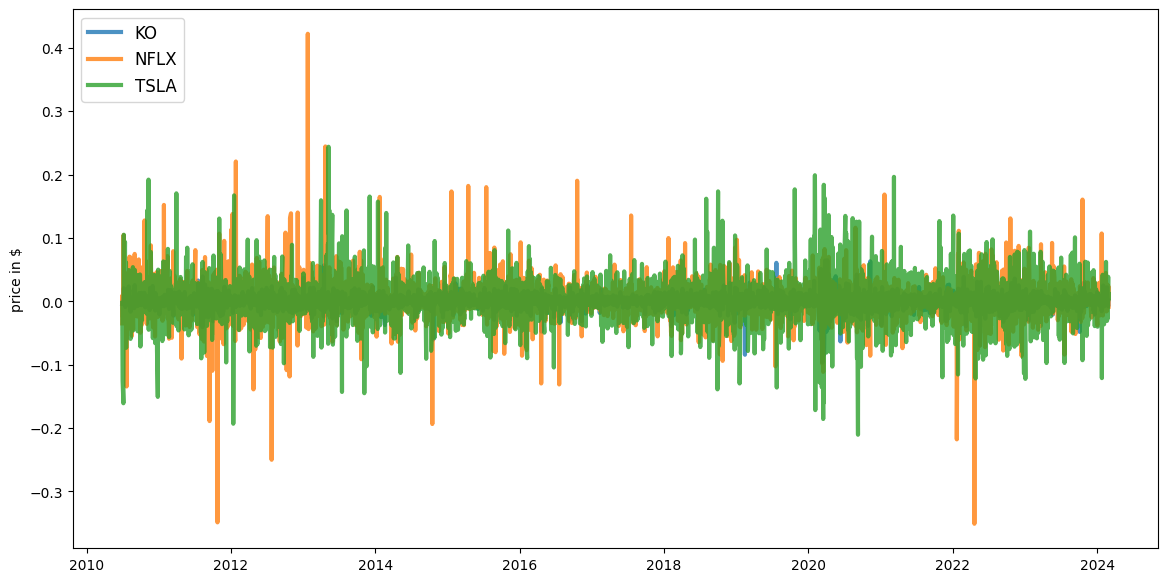

In [8]:
returns = table.pct_change()

plt.figure(figsize=(14,7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3,alpha=0.8, label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

In [9]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*252  #252 dias habiles en la bolsa
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [10]:
def random_portfolios(n_companies:int, num_portfolios:int, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(n_companies)
        weights /= np.sum(weights)
        weights_record.append(weights)

        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights=weights, mean_returns=mean_returns,cov_matrix=cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return-risk_free_rate) / portfolio_std_dev
    
    return results, weights_record

In [16]:
def display_simulated_ef_with_random(n_companies:int, mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(n_companies=n_companies, num_portfolios=num_portfolios, mean_returns=mean_returns, cov_matrix=cov_matrix, risk_free_rate=risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=table.columns, columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_sharpe_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0, min_sharpe_idx], results[1, min_sharpe_idx]
    min_vol_allocation = pd.DataFrame(weights[min_sharpe_idx], index=table.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print('-'*40)
    print('max sharpe ratio portfolio allocation\n')
    print('anual return', round(rp,2))
    print('anual volatilidad', round(sdp,2))
    print('\n')
    print(max_sharpe_allocation)
    print('-'*40)
    print('min volatility portfolio allocation\n')
    print('anual return', round(rp_min,2))
    print('anual volatilidad', round(sdp_min,2))
    print('\n')

    plt.figure(figsize=(10,7))
    plt.scatter(results[0,:], results[1,:], cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp, marker='*', color='r', s=500, label='Max sharpe ratio')
    plt.scatter(sdp_min,rp_min, marker='*', color='g', s=500, label='min volatility')
    plt.title('Simulacion de portafolio optimo   basado en la frontera efficeinte')
    plt.xlabel('volatilidad anual')
    plt.ylabel('retorno anualizado')
    plt.legend(labelspacing=0.8)

    return results, weights


----------------------------------------
max sharpe ratio portfolio allocation

anual return 0.25
anual volatilidad 0.26


               KO   NFLX   TSLA  BABA     KO
allocation  16.89  31.69  25.77   0.3  25.34
----------------------------------------
min volatility portfolio allocation

anual return 0.1
anual volatilidad 0.17




/tmp/ipykernel_16212/3664704110.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results[0,:], results[1,:], cmap='YlGnBu', marker='o', s=10, alpha=0.3)


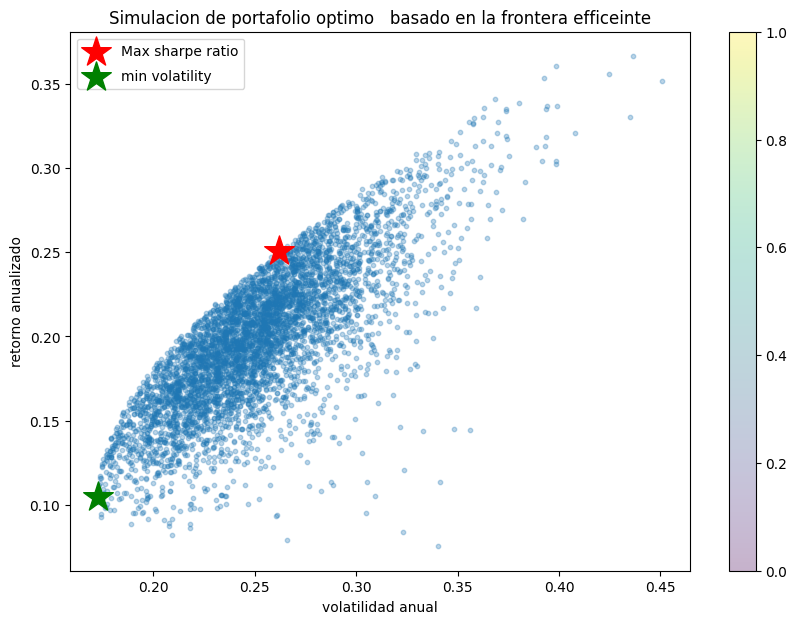

In [17]:
path = '/home/PedroSci/Documents/RegistroClima/PortfolioSelection/dataAdjClose.csv'
stocks = ['KO',	'NFLX',	'TSLA', 'BABA', 'KO']
n_companies = len(stocks)
num_portfolios = 5000
risk_free_rate = 0.0001


table = createDataset(path=path, stocks=stocks)
returns, mean_returns, cov_matrix = table_retusns_cov(table)
results, weights = display_simulated_ef_with_random(n_companies=n_companies,mean_returns=mean_returns, cov_matrix=cov_matrix, num_portfolios=num_portfolios, risk_free_rate=risk_free_rate)

In [13]:
# portfolio_annualised_performance(weights=weights, mean_returns=mean_returns,cov_matrix=cov_matrix)

# results, weights = random_portfolios(num_portfolios=num_portfolios, mean_returns=mean_returns, cov_matrix=cov_matrix, risk_free_rate=risk_free_rate)


In [14]:
returns, mean_returns, cov_matrix = table_retusns_cov(table)
weights = np.random.random(3)
weights /= np.sum(weights)
returns = np.sum(mean_returns*weights)*252  #252 dias habiles en la bolsa
# std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
mean_returns

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

In [ ]:
returns = table.pct_change()
mean_returns = returns.mean()
type(mean_returns)

pandas.core.series.Series

In [28]:
# results, weights
# np.sum(weights[0])
weights

[array([0.34665558, 0.30403921, 0.15740108, 0.11734099, 0.07456314]),
 array([0.20095984, 0.32724513, 0.07224354, 0.31426722, 0.08528427]),
 array([0.45856743, 0.16550961, 0.04079532, 0.29142838, 0.04369926]),
 array([0.28335137, 0.30725857, 0.14660175, 0.24354709, 0.01924121]),
 array([0.07359136, 0.34654754, 0.30508197, 0.22637012, 0.04840901]),
 array([0.1120823 , 0.46350175, 0.28062598, 0.06852523, 0.07526474]),
 array([0.22517045, 0.21914201, 0.1402962 , 0.19655213, 0.2188392 ]),
 array([0.22612622, 0.21391312, 0.2250414 , 0.12930857, 0.20561069]),
 array([0.24464776, 0.17340278, 0.008588  , 0.27145642, 0.30190504]),
 array([0.1133466 , 0.29185512, 0.00869423, 0.25859183, 0.32751222]),
 array([0.40160582, 0.35304621, 0.06494053, 0.02588511, 0.15452233]),
 array([0.28508697, 0.2449383 , 0.22909355, 0.11584197, 0.12503921]),
 array([0.15398665, 0.15416098, 0.18209937, 0.34954211, 0.16021089]),
 array([0.14949588, 0.13097418, 0.23690001, 0.23490996, 0.24771998]),
 array([0.04891471, 

In [43]:
# df_ = pd.DataFrame(, columns=)
df2 = pd.DataFrame(weights, columns=stocks)

df1 = pd.DataFrame(results.T, columns=['Volatilidad', 'Retorno', 'Riesgo'])
df = pd.concat([df1, df2], axis=1)

df

,Volatilidad,Retorno,Riesgo,KO,NFLX,TSLA,BABA,KO
0,0.238411,0.211845,0.888153,0.346656,0.304039,0.157401,0.117341,0.074563
1,0.262474,0.184867,0.703942,0.200960,0.327245,0.072244,0.314267,0.085284
2,0.210831,0.134478,0.637373,0.458567,0.165510,0.040795,0.291428,0.043699
3,0.259245,0.206110,0.794654,0.283351,0.307259,0.146602,0.243547,0.019241
4,0.322243,0.268763,0.833728,0.073591,0.346548,0.305082,0.226370,0.048409
...,...,...,...,...,...,...,...,...
4995,0.240090,0.228594,0.951702,0.057113,0.320470,0.187793,0.007635,0.426989
4996,0.216726,0.145413,0.670493,0.222435,0.243204,0.012913,0.262255,0.259193
4997,0.242774,0.223569,0.920483,0.026686,0.227139,0.247829,0.070930,0.427416
4998,0.241059,0.172512,0.715226,0.133956,0.343904,0.017460,0.246903,0.257776


In [44]:
    df2 = pd.DataFrame(weights, columns=stocks)

    df1 = pd.DataFrame(results.T, columns=['Volatilidad', 'Retorno', 'Riesgo'])
    df = pd.concat([df1, df2], axis=1)
    output = {
        'MarkowitzPortfolio':{
            'retorno': round(rp,2),
            'volatilidad': round(sdp,2),
            'composicion':max_sharpe_allocation
        },
        'PortafolioMinVolatilidad':{
            'retorno': round(rp_min,2),
            'volatilidad': round(sdp_min,2),
            'composicion':min_vol_allocation
        },
        'PortafoliosAleatorios': df
    }

NameError: name 'rp' is not defined